In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw4_backpropagation.ipynb")

# **Notebook 4: Backpropagation**

In this notebook we will implement a fully connected neural network manually and
then complete forward and backward pass functions. We'll then put it all together
in a training loop.

We'll follow the steps in section 7.4 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO" or incomplete
lines that end with `...`. Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

### Completing the notebook on Colab

To complete the notebook on Colab, you can click on the "Open in Colab" button
below and it will open the notebook from our public class notebook repository
on GitHub.

> Note that you will have save the notebook to your own Google Drive by clicking
on File -> Save a Copy in Drive.

> Also note that the Otter Grader cells will not run in Colab, but you can just
> avoid executing those cells. For any public tests, you can submit to Gradescope
> and inspect your results there.

<a href="https://colab.research.google.com/github/DL4DS/sp2025_homeworks/blob/main/hw4/hw4_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<!-- BEGIN QUESTION -->

## Statement of AI Use and Correction Reflection (if applicable)

You may use ChatGPT/Generative AI as a resource to help you complete the assignment. 
However, it must be used constructively to help you understand things you are 
unsure of, and be built upon with original code. 

You must cite your interaction 
by describing your prompt and the corresponding response. 
In addition, you must  explain all code from the AI that you implement in your 
assignment with inline comments. 
Touch upon how the code works and how it helped you. Failure to do 
so could result in credit deduction. 

The official GAIA Policy can be found here: https://www.bu.edu/cds-faculty/culture-community/gaia-policy/ 

Moreover, if this is a correction submission after the initial submission, 
you must provide a reflection on what you learned from the initial submission 
and how you corrected it.

_Type your answer here, replacing this text._

<!-- END QUESTION -->



In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Define a simple network

Define the number of hidden layers, neurons per layer, input layer, and output layer.

In [3]:
# Number of hidden layers
K = 5

# Number of neurons per layer
D = 6

# Input layer
D_i = 1

# Output layer
D_o = 1

Create all the weight matrices and bias vectors for the dimensions we defined,
initialized with random (normally distributed) numbers.

In [4]:
# Set seed so we always get the same random numbers
np.random.seed(0)

#   Create a network with K hidden layers, D neurons per layer, D_i input neurons,
#  and D_o output neurons. Normalize the weights and biases to be standard normal.
def create_network(K, D, D_i, D_o):
  # Make empty lists
  all_weights = [None] * (K+1)
  all_biases = [None] * (K+1)

  # Create input and output layers
  all_weights[0] = np.random.normal(size=(D, D_i))
  all_weights[-1] = np.random.normal(size=(D_o, D))
  all_biases[0] = np.random.normal(size =(D,1))
  all_biases[-1]= np.random.normal(size =(D_o,1))

  # Create intermediate layers
  for layer in range(1,K):
    all_weights[layer] = np.random.normal(size=(D,D))
    all_biases[layer] = np.random.normal(size=(D,1))

  return all_weights, all_biases

all_weights, all_biases = create_network(K, D, D_i, D_o)


In [12]:
print(all_weights[-1])

[[ 0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351]]


We can print out the shapes of the weights and biases for each layer.

In [13]:
print("Layer shapes:")
for i, (weights, biases) in enumerate(zip(all_weights, all_biases)):
    print(f"Layer {i}: weights shape = {weights.shape}, biases shape = {biases.shape}")


Layer shapes:
Layer 0: weights shape = (6, 1), biases shape = (6, 1)
Layer 1: weights shape = (6, 6), biases shape = (6, 1)
Layer 2: weights shape = (6, 6), biases shape = (6, 1)
Layer 3: weights shape = (6, 6), biases shape = (6, 1)
Layer 4: weights shape = (6, 6), biases shape = (6, 1)
Layer 5: weights shape = (1, 6), biases shape = (1, 1)


In [14]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation: np.ndarray) -> np.ndarray:
  activation = preactivation.clip(0.0)
  return activation

Now let's complete the forward pass function for our random network and run it.

The weight matrices $\boldsymbol\Omega_{0\ldots K}$ are the entries of the list "all_weights" and the biases $\boldsymbol\beta_{0\ldots K}$ are the entries of the list "all_biases"

We know that we will need the preactivations $\mathbf{f}_{0\ldots K}$ and the activations $\mathbf{h}_{1\ldots K}$ for the forward pass of backpropagation, so we'll store and return these as well.


### 4.1 Complete the code below to implement the forward pass

In [15]:
# Compute the forward pass of the network.
# The input, net_input, is a matrix of shape (D_i, N) where N is the number of samples,
# which means that when N>1, we'll get N output samples from the network as well.
# We also return the preactivations and activations at each layer as lists of matrices.
# We also return the preactivations and activations at each layer as lists of matrices.
def forward_pass(net_input, all_weights, all_biases):

  # Retrieve number of layers
  K = len(all_weights) -1

  # We'll store the pre-activations at each layer in a list "all_f"
  # and the activations in a second list "all_h".
  all_f = [None] * (K+1)
  all_h = [None] * (K+1)

  #For convenience, we'll set
  # all_h[0] to be the input, and all_f[K] will be the output
  all_h[0] = net_input

  # Run through the layers, calculating all_f[0...K-1] and all_h[1...K]
  for layer in range(K):
      # Update preactivations and activations at this layer according to eqn 7.17
      # Remember to use np.matmul for matrix multiplications
      # TODO -- Complete the lines below
      all_f[layer] = np.matmul(all_weights[layer], all_h[layer]) + all_biases[layer]
      all_h[layer+1] = ReLU(all_f[layer])

  # Compute the output from the last hidden layer
  # TODO -- Complete the line below
  all_f[K] = np.matmul(all_weights[K], all_h[K]) + all_biases[K]

  # Retrieve the output
  net_output = all_f[K]

  return net_output, all_f, all_h

In [16]:
# Define input
net_input = np.ones((D_i,1)) * 1.2

# Compute network output
net_output, all_f, all_h = forward_pass(net_input,all_weights, all_biases)


In [17]:
print("Preactivation and activation shapes:")

def print_activations(all_f, all_h):
    for i, (f, h) in enumerate(zip(all_f, all_h)):
        if i == 0:
            print(f"h_0 shape = {h.shape}\n")
            print(f"f_0 shape = {f.shape}", end=" ")
        else:
            print(f"h_{i} shape = {h.shape}\n")
            print(f"f_{i} shape = {f.shape}", end=" ")
        print()

print_activations(all_f, all_h)


Preactivation and activation shapes:
h_0 shape = (1, 1)

f_0 shape = (6, 1) 
h_1 shape = (6, 1)

f_1 shape = (6, 1) 
h_2 shape = (6, 1)

f_2 shape = (6, 1) 
h_3 shape = (6, 1)

f_3 shape = (6, 1) 
h_4 shape = (6, 1)

f_4 shape = (6, 1) 
h_5 shape = (6, 1)

f_5 shape = (1, 1) 


In [18]:
# Define input
net_input = np.ones((D_i,1)) * 1.2

# Compute network output
net_output, all_f, all_h = forward_pass(net_input,all_weights, all_biases)

In [19]:
grader.check("q1")

q1 results: All test cases passed!

Now let's define a loss function.  We'll just use the least squares loss function. We'll also write a function to compute 
$\partial l / \partial \mathbf{f}_K$, e.g. the derivative of the loss with respect to the output of the network.

In [20]:
# Initalize the network again

# Set seed so we always get the same random numbers
np.random.seed(0)

# Define network dimensions back to 1-D input
K = 5; D = 6; D_i = 1; D_o = 1

# Create and initialize the network
all_weights, all_biases = create_network(K, D, D_i, D_o)

# Define input
net_input = np.ones((D_i,1)) * 1.2
print("net_input.shape", net_input.shape)

# Compute the forward pass
net_output, all_f, all_h = forward_pass(net_input,all_weights, all_biases)
print("net_output", net_output)


net_input.shape (1, 1)
net_output [[1.906605]]


In [21]:
def least_squares_loss(net_output: np.ndarray, y: np.ndarray) -> float:
  return np.sum((net_output-y) * (net_output-y))

def d_loss_d_output(net_output, y):
    return 2*(net_output - y);

In [22]:
y = np.ones((D_o,1)) * 20.0
loss = least_squares_loss(net_output, y)
print(f"y = {y} Loss = {loss:.3f}")

y = [[20.]] Loss = 327.371


Now let's compute the derivatives of the network.  We already computed the forward pass.  Let's compute the backward pass.

### 4.2 Complete the code below to implement the backward pass

In [23]:
# We'll need the indicator function
def indicator_function(x):
  x_in = np.array(x)
  x_in[x_in>0] = 1
  x_in[x_in<=0] = 0
  return x_in

# Main backward pass routine
def backward_pass(all_weights, all_biases, all_f, all_h, y):

  # Retrieve number of layers
  K = len(all_weights) -1

  # We'll store the derivatives dl_dweights and dl_dbiases in lists as well
  all_dl_dweights = [None] * (K+1)
  all_dl_dbiases = [None] * (K+1)
  
  # And we'll store the derivatives of the loss with respect to the activation and preactivations in lists
  all_dl_df = [None] * (K+1)
  all_dl_dh = [None] * (K+1)
  
  # Again for convenience we'll stick with the convention that all_h[0] is the net input and all_f[k] in the net output

  # Compute derivatives of the loss with respect to the network output
  all_dl_df[K] = np.array(d_loss_d_output(all_f[K],y))

  # Now work backwards through the network, Follow from equations 7.22 onwards
  for layer in range(K,-1,-1):

    # TODO Calculate the derivatives of the loss with respect to the biases at layer from all_dl_df[layer]. (eq 7.22)
    # NOTE!  To take a copy of matrix X, use Z=np.array(X)
    # COMPLETE THIS LINE
    all_dl_dbiases[layer] = np.array(all_dl_df[layer])

    # TODO Calculate the derivatives of the loss with respect to the weights at layer from all_dl_df[layer] and 
    # all_h[layer] (eq 7.23)
    # Don't forget to use np.matmul
    # COMPLETE THIS LINE
    all_dl_dweights[layer] = np.matmul(all_dl_dbiases[layer], all_h[layer].T)

    # TODO: calculate the derivatives of the loss with respect to the activations from weight and derivatives of next
    # preactivations (second part of last line of eq 7.25)
    # COMPLETE THIS LINE
    all_dl_dh[layer] = np.matmul(all_weights[layer].T, all_dl_dbiases[layer])


    if layer > 0:
      # TODO Calculate the derivatives of the loss with respect to the pre-activation f (use derivative of ReLu function,
      # first part of last line of eq. 7.25)
      # COMPLETE THIS LINE
      all_dl_df[layer-1] = all_dl_dh[layer] * indicator_function(all_f[layer-1])

  return all_dl_dweights, all_dl_dbiases

In [24]:
all_dl_dweights, all_dl_dbiases = backward_pass(all_weights, all_biases, all_f, all_h, y)

In [25]:
np.set_printoptions(precision=3)
# Make space for derivatives computed by finite differences
all_dl_dweights_fd = [None] * (K+1)
all_dl_dbiases_fd = [None] * (K+1)

# Let's test if we have the derivatives right using finite differences
delta_fd = 0.000001

# Test the dervatives of the bias vectors
for layer in range(K+1):
  dl_dbias  = np.zeros_like(all_dl_dbiases[layer])
  # For every element in the bias
  for row in range(all_biases[layer].shape[0]):
    # Take copy of biases  We'll change one element each time
    all_biases_copy = [np.array(x) for x in all_biases]
    all_biases_copy[layer][row] += delta_fd
    network_output_1, *_ = forward_pass(net_input, all_weights, all_biases_copy)
    network_output_2, *_ = forward_pass(net_input, all_weights, all_biases)
    dl_dbias[row] = (least_squares_loss(network_output_1, y) - least_squares_loss(network_output_2,y))/delta_fd
  all_dl_dbiases_fd[layer] = np.array(dl_dbias)
  print("-----------------------------------------------")
  print("Bias %d, derivatives from backprop:"%(layer))
  print(all_dl_dbiases[layer])
  print("Bias %d, derivatives from finite differences"%(layer))
  print(all_dl_dbiases_fd[layer])
  assert np.allclose(all_dl_dbiases_fd[layer],all_dl_dbiases[layer],rtol=1e-05, atol=1e-08, equal_nan=False), "Derivatives do not match"
  if np.allclose(all_dl_dbiases_fd[layer],all_dl_dbiases[layer],rtol=1e-05, atol=1e-08, equal_nan=False):
    print("Success!  Derivatives match.")
  else:
    print("Failure!  Derivatives different.")



# Test the derivatives of the weights matrices
for layer in range(K+1):
  dl_dweight  = np.zeros_like(all_dl_dweights[layer])
  # For every element in the bias
  for row in range(all_weights[layer].shape[0]):
    for col in range(all_weights[layer].shape[1]):
      # Take copy of biases  We'll change one element each time
      all_weights_copy = [np.array(x) for x in all_weights]
      all_weights_copy[layer][row][col] += delta_fd
      network_output_1, *_ = forward_pass(net_input, all_weights_copy, all_biases)
      network_output_2, *_ = forward_pass(net_input, all_weights, all_biases)
      dl_dweight[row][col] = (least_squares_loss(network_output_1, y) - least_squares_loss(network_output_2,y))/delta_fd
  all_dl_dweights_fd[layer] = np.array(dl_dweight)
  print("-----------------------------------------------")
  print("Weight %d, derivatives from backprop:"%(layer))
  print(all_dl_dweights[layer])
  print("Weight %d, derivatives from finite differences"%(layer))
  print(all_dl_dweights_fd[layer])
  assert np.allclose(all_dl_dweights_fd[layer],all_dl_dweights[layer],rtol=1e-05, atol=1e-08, equal_nan=False), "Derivatives do not match"
  if np.allclose(all_dl_dweights_fd[layer],all_dl_dweights[layer],rtol=1e-05, atol=1e-08, equal_nan=False):
    print("Success!  Derivatives match.")
  else:
    print("Failure!  Derivatives different.")

-----------------------------------------------
Bias 0, derivatives from backprop:
[[ -4.486]
 [  4.947]
 [  6.812]
 [ -3.883]
 [-24.935]
 [  0.   ]]
Bias 0, derivatives from finite differences
[[ -4.486]
 [  4.947]
 [  6.812]
 [ -3.883]
 [-24.935]
 [  0.   ]]
Success!  Derivatives match.
-----------------------------------------------
Bias 1, derivatives from backprop:
[[ -0.   ]
 [-11.297]
 [  0.   ]
 [  0.   ]
 [-10.722]
 [  0.   ]]
Bias 1, derivatives from finite differences
[[  0.   ]
 [-11.297]
 [  0.   ]
 [  0.   ]
 [-10.722]
 [  0.   ]]
Success!  Derivatives match.
-----------------------------------------------
Bias 2, derivatives from backprop:
[[-0.   ]
 [-0.   ]
 [ 0.938]
 [ 0.   ]
 [-9.993]
 [ 0.508]]
Bias 2, derivatives from finite differences
[[ 0.   ]
 [ 0.   ]
 [ 0.938]
 [ 0.   ]
 [-9.993]
 [ 0.508]]
Success!  Derivatives match.
-----------------------------------------------
Bias 3, derivatives from backprop:
[[-0.   ]
 [-4.8  ]
 [-1.661]
 [-0.   ]
 [ 3.393]
 [ 5.391]

In [26]:
grader.check("q2")

q2 results: All test cases passed!

## Training the Network

Now we have all the pieces we need to implement a training loop. We'll define
a trivial data set of 4 samples, and then construct a training loop and run it.

### Create dataset

Define our training set to be 4 samples, 3 dimensional input, and 1 dimensional output.

In [27]:
net_input = np.array([
        [2.0, 3.0, -1.0],
        [3.0, -1.0, 0.5],
        [0.5, 1.0, 1.0],
        [1.0, 1.0, -1.0]
    ])
net_input = net_input.T
print("net_input", net_input)
print("net_input.shape", net_input.shape)

y = np.array([1.0, 0.0, 0.0, 1.0])
print("y", y)
print("y.shape", y.shape)


net_input [[ 2.   3.   0.5  1. ]
 [ 3.  -1.   1.   1. ]
 [-1.   0.5  1.  -1. ]]
net_input.shape (3, 4)
y [1. 0. 0. 1.]
y.shape (4,)


### Define and initialize the network

Define the dimensions of the network.

In [28]:
# Number of hidden layers
K = 5
# Number of neurons per layer
D = 6
# Input layer
D_i = 3
# Output layer
D_o = 1


Define and initialize the appropriate number of weights and biases for each layer.

We randomly initialize each to a standard normal.

In [29]:
# Set seed so we always get the same random numbers
np.random.seed(0)

all_weights, all_biases = create_network(K, D, D_i, D_o)

Print the shapes of the weights and biases for each layer.

In [30]:
print("Layer shapes:")
for i, (weights, biases) in enumerate(zip(all_weights, all_biases)):
    print(f"Layer {i}: weights shape = {weights.shape}, biases shape = {biases.shape}")

Layer shapes:
Layer 0: weights shape = (6, 3), biases shape = (6, 1)
Layer 1: weights shape = (6, 6), biases shape = (6, 1)
Layer 2: weights shape = (6, 6), biases shape = (6, 1)
Layer 3: weights shape = (6, 6), biases shape = (6, 1)
Layer 4: weights shape = (6, 6), biases shape = (6, 1)
Layer 5: weights shape = (1, 6), biases shape = (1, 1)


### Training Loop


We can calculate the forward pass. Because of the broadcasting rules of numpy, 
we can give all the inputs as one matrix and get the output for all the inputs at once.

In [35]:
num_iterations = 200
alpha = 0.01   # learning rate

losses = []
for i in range(num_iterations):
    net_output, all_f, all_h = forward_pass(net_input,all_weights, all_biases)
    y_pred = net_output
    loss = least_squares_loss(y_pred, y)
    losses.append(loss)
    print(f"Iteration {i+1}: Loss = {loss:.3f}")

    all_dl_dweights, all_dl_dbiases = backward_pass(all_weights, all_biases, all_f, all_h, y)

    for i, (weights, biases) in enumerate(zip(all_weights, all_biases)):
        all_weights[i] = weights - alpha * all_dl_dweights[i]
        all_biases[i] = biases - alpha * all_dl_dbiases[i]

print(y)
print(y_pred)

Iteration 1: Loss = 0.000
Iteration 2: Loss = 0.000
Iteration 3: Loss = 0.000
Iteration 4: Loss = 0.000
Iteration 5: Loss = 0.000
Iteration 6: Loss = 0.000
Iteration 7: Loss = 0.000
Iteration 8: Loss = 0.000
Iteration 9: Loss = 0.000
Iteration 10: Loss = 0.000
Iteration 11: Loss = 0.000
Iteration 12: Loss = 0.000
Iteration 13: Loss = 0.000
Iteration 14: Loss = 0.000
Iteration 15: Loss = 0.000
Iteration 16: Loss = 0.000
Iteration 17: Loss = 0.000
Iteration 18: Loss = 0.000
Iteration 19: Loss = 0.000
Iteration 20: Loss = 0.000
Iteration 21: Loss = 0.000
Iteration 22: Loss = 0.000
Iteration 23: Loss = 0.000
Iteration 24: Loss = 0.000
Iteration 25: Loss = 0.000
Iteration 26: Loss = 0.000
Iteration 27: Loss = 0.000
Iteration 28: Loss = 0.000
Iteration 29: Loss = 0.000
Iteration 30: Loss = 0.000
Iteration 31: Loss = 0.000
Iteration 32: Loss = 0.000
Iteration 33: Loss = 0.000
Iteration 34: Loss = 0.000
Iteration 35: Loss = 0.000
Iteration 36: Loss = 0.000
Iteration 37: Loss = 0.000
Iteration 

Let's plot the loss over the iterations.  We'll plot the full loss over the iterations, and then zoom in on the loss from iteration 10 onwards.

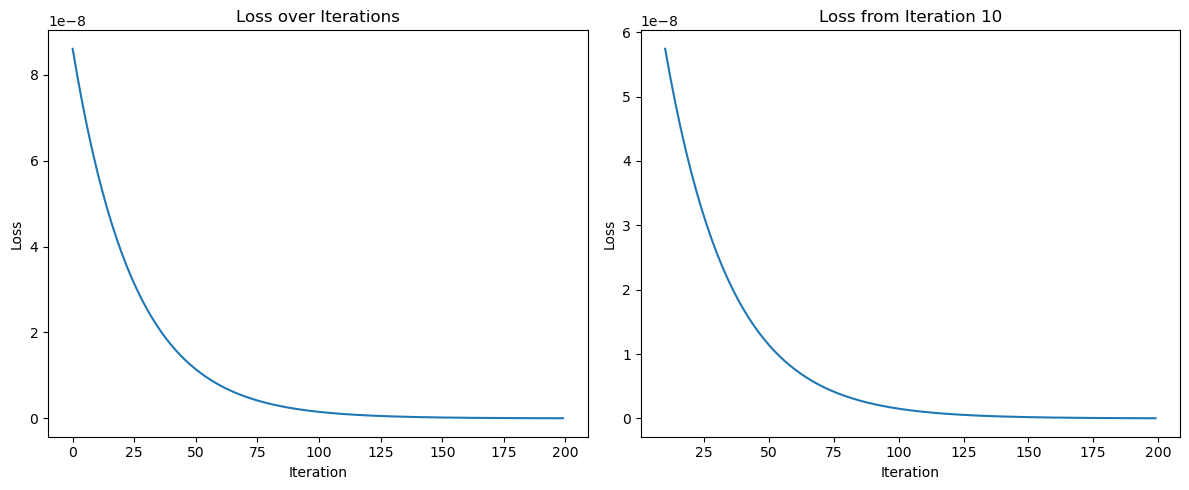

In [36]:
# plot the losses
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Full plot
ax1.plot(losses)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over Iterations')

# Plot starting from iteration 10
ax2.plot(range(10, len(losses)), losses[10:])
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')
ax2.set_title('Loss from Iteration 10')

plt.tight_layout()
plt.show()




<!-- BEGIN QUESTION -->

**Question 3:**

What do you notice about how the loss progresses over the iterations? Is it a gradual decrease or a sharp decrease? To what do you attribute the rate of
decrease in the first few iterations?

There is an initial sharp decrease followed by a more gradual decline - it drops drastically from 1209.745 to 53.034 between iterations 1 and 2.From iteration 4  it decreases steadily but at a slower rate. The rapid decrease is due to a high learning rate or the model quickly finding a better region. This happens because the initial weights and biases are far from optimal and gradient descent takes large corrective steps.


<!-- END QUESTION -->

## Build and Train an Equivalent Network with PyTorch


For comparison, we'll now define the network in PyTorch and train it with the
same tiny dataset. Hopefully you see some similarities in how the network is
defined and trained.

In [37]:
import torch
from torch import nn
from torch.optim import SGD

# Manually seed the Random Number Generator for Reproducibility
# You can comment the next line out see the variability
torch.manual_seed(99)

# Step 1: Define the MLP model
class ptMLP(nn.Module):
    def __init__(self):
        super(ptMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(3, 6),
            nn.ReLU(),
            nn.Linear(6, 6),
            nn.ReLU(),
            nn.Linear(6, 6),
            nn.ReLU(),
            nn.Linear(6, 6),
            nn.ReLU(),
            nn.Linear(6, 6),
            nn.ReLU(),
            nn.Linear(6, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = ptMLP()
print(model)

ptMLP(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=6, bias=True)
    (3): ReLU()
    (4): Linear(in_features=6, out_features=6, bias=True)
    (5): ReLU()
    (6): Linear(in_features=6, out_features=6, bias=True)
    (7): ReLU()
    (8): Linear(in_features=6, out_features=6, bias=True)
    (9): ReLU()
    (10): Linear(in_features=6, out_features=1, bias=True)
  )
)


Define a loss function and an optimizer.

In [38]:
# Step 2: Define a loss function and an optimizer
criterion = nn.MSELoss(reduction='sum')
optimizer = SGD(model.parameters(), lr=0.01)

Recreate the tiny dataset.

In [39]:
#| code-fold: false
# Step 3: Create a tiny dataset
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

# we had to transpose ys for torch.tensor
ys_transpose = [[1.0], 
      [0.0], 
      [0.0], 
      [1.0]]

inputs = torch.tensor(xs)
outputs = torch.tensor(ys_transpose)

Define and run the training loop.

In [40]:
# Step 4: Write the training loop
losses = []
niters = 300

for epoch in range(niters):

    # Training Step 1: Forward pass
    predictions = model(inputs)

    # Training Step 2: Calculate the loss
    loss = criterion(predictions, outputs)

    # Training Step 3: Zero the gradient and run backward pass
    optimizer.zero_grad()
    loss.backward()

    # Training Step 4: Update parameters
    optimizer.step()

    losses.append(loss.item())
    # print(f'Epoch {epoch+1}, Loss: {loss.item()}')

print(f'Final Loss: {loss.item()}')

Final Loss: 0.004101193509995937


Plot the loss over the iterations.

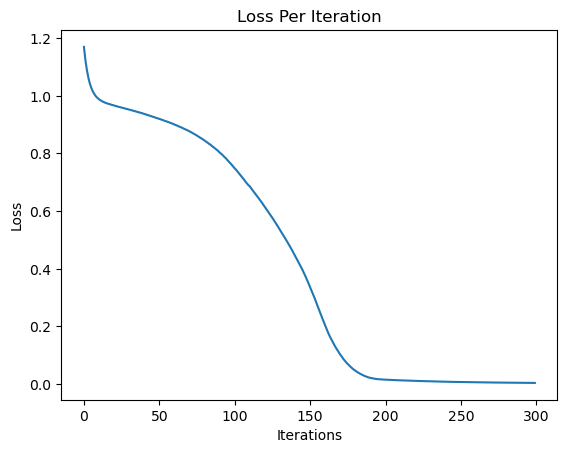

In [41]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss Per Iteration")
plt.show()

Look at the predictions and the true values.

In [42]:
list(zip(outputs, [y.item() for y in predictions]))

[(tensor([1.]), 1.0349582433700562),
 (tensor([0.]), 0.0129433274269104),
 (tensor([0.]), -0.003262162208557129),
 (tensor([1.]), 0.9480293989181519)]

<!-- BEGIN QUESTION -->

**Question 4:**

Compare the loss curves and number of iterations between the PyTorch implemenation  and the manual implementation.

What differences do you see?

To what do you attribute the differences?

In the pytorch implementation, the loss decreases more steadily and does not drop as sharply in the first few iterations. It has more controlled descent but still reaches a low loss relatively quickly. The final loss is 0.0041, which shows strong convergence. This might be due to better numerical handling whihc is done by pytorch automaticaly.. Or automatic differentiation. PyTorch autograd computes gradients more efficiently and prevents errors compared to manual implementation where errors might occur. Manual implementation has a sharp initial drop, likely due to a high learning rate without momentum. PyTorch is more robust and generalizes better

---

<div style="text-align: center;">
<b>The End</b>
</div>

---
